In [7]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import os
import matplotlib.pyplot as plt
import re
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from skimage.color import rgb2gray


# A few notes

* I have used the data that Line posted 
* The notebook is a bit messy at the moment
* We need to add nmf and maybe Archtype Analysis. The nmf should be spot on for images and can extract different features that define a face. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
* Archtype Analysis can extract extreme features out of a face. 
* There is an implementation of nmf that we can try out. 
* I got the reconstruction of faces dependent on the number pc's to work :-)
* I dont see an implementation of Archtype Analysis in sklearn
* There is an implementation in sklearn of FastICA, but I dont think it is relevant for our images
* I am using Anaconda and the only package you need to install is : pip install scikit-image
* I have standardized the data (x-mu)/std. In the book they only do X-mu. We can have a look at that. 
* There is a python package that might be interesting to use : https://panel.holoviz.org/ this allows us to make wigdets in a notebook
* Interesting analysis: 
    * Can we see a difference in the features over age ?
    * Can we see a difference in features between sex?
    * Can we see a smile ? Sadness in features ? (Do all the images smile?). 
    * Other ?


In [8]:
def load_images(folder):
    images = []
    #agelabel=[]
    #genderlabel=[]
    #s=0
    for filename in range(len(os.listdir(folder))):
        #print(filename)
        img = mpimg.imread(os.path.join(folder, str(filename)+'.jpg'))
        if img is not None:
            images.append(img)
            #print(filename)
            #agelabel.append(filename.split("_",1)[0])
            #print(filename.split("_",2)[1])
            #genderlabel.append(filename.split("_",2)[1])
            #s=s+1
    return images

In [9]:
link='/Users/Soren.Johansenc3.ai/Library/CloudStorage/OneDrive-Personal/FleksMaster/ComputationalDataAnalysis/Usecase2/data/Faces/'

In [10]:
range(len(os.listdir(link)))

range(0, 23705)

In [11]:
dataimg=load_images(link)

In [12]:
len(dataimg)

23705

In [13]:
link1='/Users/Soren.Johansenc3.ai/Library/CloudStorage/OneDrive-Personal/FleksMaster/ComputationalDataAnalysis/Usecase2/data/labels.csv'

In [14]:
labels=pd.read_csv(link1,header=None)

In [15]:
labels.columns=['Age','Gender','Race']

In [16]:
Age=labels.Age.copy()
# Gender=labels.Gender.copy()
# Race=labels.Race.copy()

In [17]:
Age.shape

(23705,)

In [18]:
dataimg=np.array(dataimg)

In [19]:
# number of images, height, width and RGB - (Height, Width, Channel)
dataimg.shape

(23705, 200, 200, 3)

In [20]:
dataimg.shape[0]*dataimg.shape[1]*dataimg.shape[2]

948200000

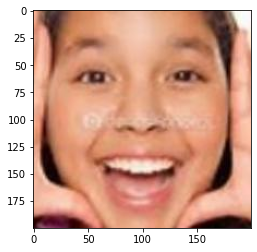

In [21]:
plt.imshow(dataimg[23704])

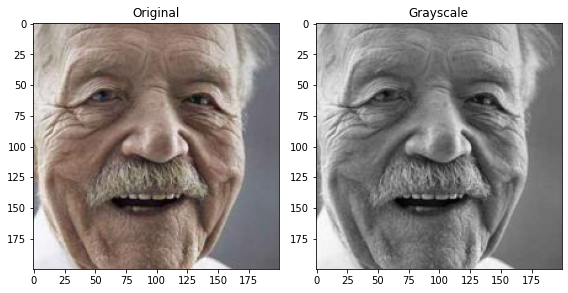

In [22]:
#import matplotlib.pyplot as plt

#from skimage import data


original = dataimg[0]
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()


In [23]:
graydata = rgb2gray(dataimg)

In [24]:
graydata.shape

(23705, 200, 200)

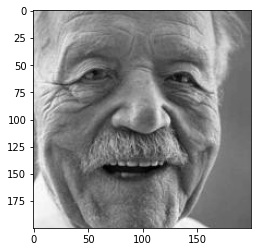

In [25]:
plt.imshow(graydata[0],cmap=plt.cm.gray)

In [26]:
Age

0        100
1        100
2        100
3        100
4        100
        ... 
23700      9
23701      9
23702      9
23703      9
23704      9
Name: Age, Length: 23705, dtype: int64

In [27]:
#datafull=dataimg.reshape(-1,3)

In [43]:
# shape of data is now 200* 200 * 23705 long and 3 features R G B.
#datafull.shape

In [44]:
#data0=dataimg.reshape(-1,40000,3)

In [45]:
#data0.shape

In [46]:
#data0_red=data0[:,:,0]
#data0_green=data0[:,:,1]
#data0_blue=data0[:,:,2]

In [47]:
#data0_red.shape

# Clustering
* Should age be part of the clustering
* Nearest Neighbor
* Hierchical clustering

In [94]:
from sklearn.cluster import KMeans

In [95]:
kmeans=KMeans(n_clusters=5)
s=kmeans.fit(X_reduced)

In [96]:
s.cluster_centers_

array([[ 1.48710611e+02, -1.72201645e+00,  2.77454771e+01, ...,
        -6.86156422e-02,  3.25926817e-02,  5.61537591e-02],
       [ 2.32286092e+01, -1.72979792e+01, -8.24750586e+01, ...,
         4.95718247e-02, -1.36662530e-02, -4.72684904e-02],
       [-7.47366580e+00,  8.55971966e+01,  8.82547334e+00, ...,
        -1.38948045e-02, -4.00581795e-03, -1.92699647e-02],
       [-8.55040536e+00, -5.69023335e+01,  4.06429957e+01, ...,
         3.15310796e-02, -2.57506713e-02, -7.46765755e-02],
       [-1.52826205e+02, -4.08509750e+00,  8.60626497e+00, ...,
         9.37092929e-04,  9.20811347e-03,  7.82560295e-02]])

In [102]:
s.labels_

array([3, 3, 2, ..., 0, 1, 0], dtype=int32)

In [103]:
df_reduced=pd.DataFrame(X_reduced)

In [104]:
df_reduced['clusterlabel']=s.labels_

In [103]:
df_reduced=pd.DataFrame(X_reduced)

In [105]:
df_reduced['Age']=Age

In [108]:
df_reduced['Gender']=labels.Gender

In [109]:
df_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,clusterlabel,Age,Gender
0,-25.755677,-20.348254,111.867194,-21.986266,56.313842,-31.187809,-11.104131,1.278755,25.131156,-25.015726,...,-7.315970,-0.211136,5.789498,-5.525058,1.890387,-0.777409,-8.798930,3,100,0
1,78.910952,-138.941826,-9.203073,-45.840789,3.980860,15.413462,-45.371991,-12.398518,-10.560498,17.473573,...,0.377899,3.015417,-4.305848,-4.764362,0.884408,-1.099063,4.998622,3,100,0
2,130.971322,163.570209,0.377639,-37.563659,1.937547,-53.242981,-9.594724,-5.522146,0.850640,2.388193,...,-2.175750,-1.199994,-0.651506,5.036228,5.568848,4.640367,1.886777,2,100,1
3,68.171893,-9.628025,-51.857525,-14.325547,-49.867237,-4.825513,-6.820712,-26.767201,52.574750,23.361472,...,-0.017589,-6.430734,-4.069151,4.624069,-1.922844,-2.326835,-9.920262,1,100,1
4,61.659993,17.953843,-9.319205,-40.216998,-87.907657,-16.642363,-5.541435,-20.345747,39.232962,16.022051,...,3.937675,-1.193106,0.991218,1.415304,-2.219632,0.954858,1.775388,1,100,1


# PCA method
* Data is correlated see presentation from Line
* How to structure the data
* Remember to mean center the data
* The output of the pca interpretation
* Other pca method

In [32]:
#pca=PCA(n_components=3)
#pca_img=pca.fit_transform(testpicnew)

In [33]:
#blue_pic=testpic[:,:,2]

In [34]:
#blue_pic.shape

In [28]:
def center_scale(data):
    data_std=data.std(0)
    datacenter=(data-data.mean(0))/data_std
    return datacenter

#blue_std=blue_pic.std(0)
#blue_pic_center=(blue_pic-blue_pic.mean(0))/blue_std

In [29]:
graydata_center=center_scale(graydata)

In [30]:
gray_nmf=graydata.reshape(-1,40000)

In [31]:
gray_nmf.shape

(23705, 40000)

In [32]:
newdata=graydata_center.reshape(-1,40000)

In [33]:
# There is a dependency between n_batches and n_components. 

n_batches=100

inc_pca = IncrementalPCA(n_components=235, batch_size=n_batches)
for x_batch in tqdm(np.array_split(newdata,n_batches)):
    inc_pca.partial_fit(x_batch)



100%|█████████████████████████████████████████| 100/100 [07:11<00:00,  4.31s/it]


In [34]:
ratio_var=inc_pca.explained_variance_ratio_

In [35]:
#print(inc_pca.explained_variance_)

In [36]:
#print(ratio_var)

In [37]:
np.cumsum(ratio_var)

array([0.30958918, 0.43037022, 0.54614177, 0.58737514, 0.61568202,
       0.64222376, 0.66512372, 0.68233423, 0.69675245, 0.70973602,
       0.72164959, 0.73268582, 0.74250837, 0.7502751 , 0.75777991,
       0.76459397, 0.77105725, 0.77744511, 0.78324622, 0.78866199,
       0.79379201, 0.79880363, 0.80310262, 0.8071356 , 0.81112446,
       0.81493952, 0.81859061, 0.82214399, 0.82530574, 0.82834089,
       0.83136682, 0.83415529, 0.83690731, 0.83962561, 0.84220292,
       0.84474716, 0.84714133, 0.84938009, 0.85153479, 0.85360407,
       0.85562173, 0.85755866, 0.85941395, 0.86120951, 0.86294436,
       0.86464247, 0.86626256, 0.86783728, 0.86936406, 0.87087965,
       0.87234347, 0.87374141, 0.87511326, 0.87645976, 0.87777264,
       0.87906546, 0.88032286, 0.88154576, 0.88272383, 0.88387466,
       0.88501461, 0.88614389, 0.88726605, 0.8883545 , 0.88942923,
       0.89044291, 0.89145033, 0.89244656, 0.89340111, 0.89434886,
       0.89527307, 0.8961795 , 0.89707046, 0.89795121, 0.89881

In [38]:
cumsum=np.cumsum(ratio_var)
d=np.argmax(cumsum>=0.95)+1
print(d)

207


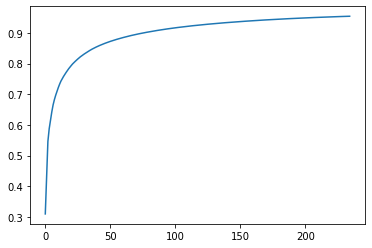

In [39]:
plt.plot(np.cumsum(ratio_var));

In [40]:
pca_final=PCA(n_components=207)
    
X_reduced=pca_final.fit_transform(newdata)

In [41]:
X_reduced.shape

(23705, 207)

In [154]:
X_re_df=pd.DataFrame(X_reduced)

In [155]:
feat_cols = ['pc'+str(i) for i in range(X_re_df.shape[1])]

In [156]:
X_re_df.columns=feat_cols

In [157]:
#X_re_df.head()

In [158]:
#import dash_bio



#dash_bio.Clustergram(
#    data=X_reduced,  
#    column_labels=list(X_reduced.columns.values),
#    row_labels=list(X_reduced.index),
#    height=800,
#width=700
#)

In [159]:
max_pc=15
X_re_small=X_re_df.iloc[: ,:max_pc]

In [160]:
X_re_small['Age']=Age

In [161]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

import numpy as np
from scipy.spatial.distance import pdist, squareform


# get data

data=X_re_small
#data = np.genfromtxt("http://files.figshare.com/2133304/ExpRawData_E_TABM_84_A_AFFY_44.tab",
#                   names=True,usecols=tuple(range(1,30)),dtype=float, delimiter="\t")
data_array = data.values
data_array = data_array.transpose()
labels =data.columns

# Initialize figure by creating upper dendrogram
fig = ff.create_dendrogram(data_array, orientation='bottom', labels=labels)
for i in range(len(fig['data'])):
    fig['data'][i]['yaxis'] = 'y2'

# Create Side Dendrogram
dendro_side = ff.create_dendrogram(data_array, orientation='right')
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'

# Add Side Dendrogram Data to Figure
for data in dendro_side['data']:
    fig.add_trace(data)

# Create Heatmap
dendro_leaves = dendro_side['layout']['yaxis']['ticktext']
dendro_leaves = list(map(int, dendro_leaves))
data_dist = pdist(data_array,metric='euclidean')
#data_dist = pdist(data_array,metric='cosine')

heat_data = squareform(data_dist)
heat_data = heat_data[dendro_leaves,:]
heat_data = heat_data[:,dendro_leaves]

heatmap = [
    go.Heatmap(
        x = dendro_leaves,
        y = dendro_leaves,
        z = heat_data,
        colorscale = 'Blues'
    )
]

heatmap[0]['x'] = fig['layout']['xaxis']['tickvals']
heatmap[0]['y'] = dendro_side['layout']['yaxis']['tickvals']

# Add Heatmap Data to Figure
for data in heatmap:
    fig.add_trace(data)

# Edit Layout
fig.update_layout({'width':800, 'height':800,
                         'showlegend':False, 'hovermode': 'closest',
                         })
# Edit xaxis
fig.update_layout(xaxis={'domain': [.15, 1],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'ticks':""})
# Edit xaxis2
fig.update_layout(xaxis2={'domain': [0, .15],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

# Edit yaxis
fig.update_layout(yaxis={'domain': [0, .85],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'showticklabels': False,
                                  'ticks': ""
                        })
# Edit yaxis2
fig.update_layout(yaxis2={'domain':[.825, .975],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

# Plot!
fig.show()

/Users/Soren.Johansenc3.ai/.local/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



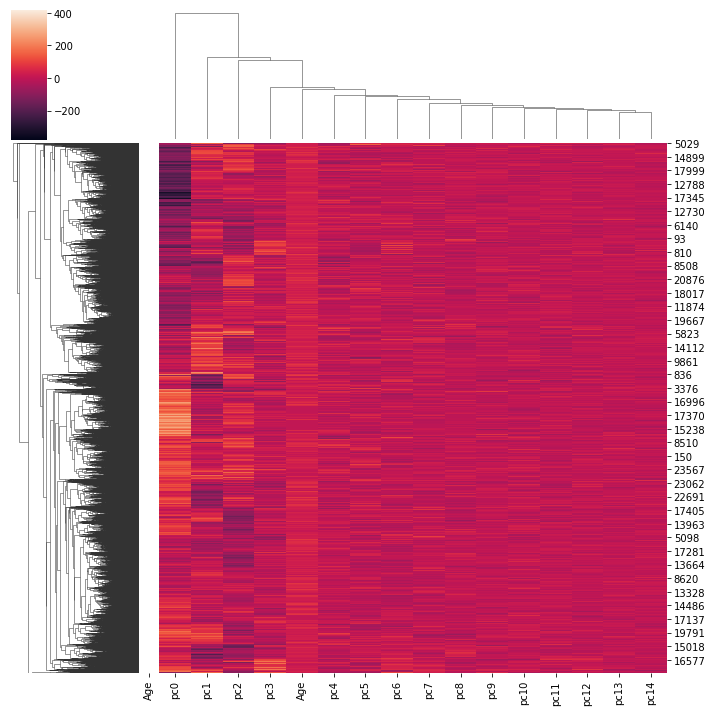

In [163]:
import seaborn as sns

#iris = sns.load_dataset("iris")
#species = iris.pop("species")
#g = sns.clustermap(X_re_small)

#g=sns.clustermap(X_re_small,
#                   figsize=(10, 8),
#                  row_cluster=False,
#                   dendrogram_ratio=(.1, .2),
#                   cbar_pos=(0, .2, .03, .4))


lut = dict(zip(Age.unique(), "rbg"))
row_colors = Age.map(lut)
g = sns.clustermap(X_re_small, row_colors=row_colors)

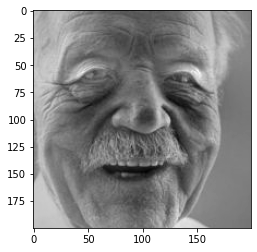

In [60]:
plt.imshow(graydata_center[0],cmap=plt.cm.gray)

In [61]:
example=graydata_center[0].reshape(-1,40000)

In [62]:
example.shape

(1, 40000)

In [63]:

#pca_recon=IncrementalPCA(n_components=70,batch_size=70)
#image_recon = pca_recon.inverse_transform(pca_recon.fit_transform(example))
 
# Plotting the reconstructed image
#plt.imshow(image_recon[1].reshape(200,200),cmap = plt.cm.gray)

def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(example[0].reshape(200,200)))
    return plt.imshow(image_recon,cmap = plt.cm.gray)



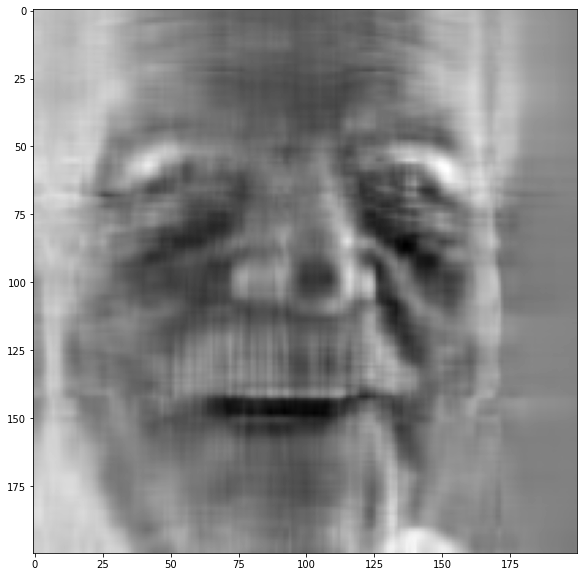

In [64]:

plt.figure(figsize=[10,10])
plot_at_k(10)

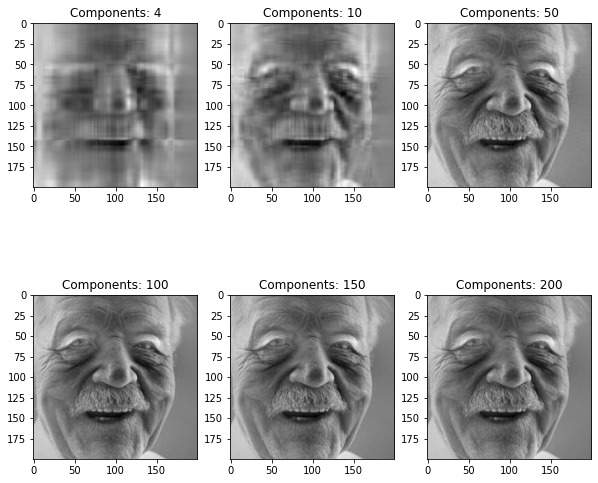

In [65]:
# If I change 200 to 207 which is the number of pc's that gives variance explained 0.95 I get an error. 

ks = [4, 10, 50, 100, 150, 200]
 
plt.figure(figsize=[10,10])
 
for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))
 
plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

# Clustering
* Should age be part of the clustering
* Nearest Neighbor
* Hierchical clustering

In [94]:
from sklearn.cluster import KMeans

In [95]:
kmeans=KMeans(n_clusters=5)
s=kmeans.fit(X_reduced)

In [96]:
s.cluster_centers_

array([[ 1.48710611e+02, -1.72201645e+00,  2.77454771e+01, ...,
        -6.86156422e-02,  3.25926817e-02,  5.61537591e-02],
       [ 2.32286092e+01, -1.72979792e+01, -8.24750586e+01, ...,
         4.95718247e-02, -1.36662530e-02, -4.72684904e-02],
       [-7.47366580e+00,  8.55971966e+01,  8.82547334e+00, ...,
        -1.38948045e-02, -4.00581795e-03, -1.92699647e-02],
       [-8.55040536e+00, -5.69023335e+01,  4.06429957e+01, ...,
         3.15310796e-02, -2.57506713e-02, -7.46765755e-02],
       [-1.52826205e+02, -4.08509750e+00,  8.60626497e+00, ...,
         9.37092929e-04,  9.20811347e-03,  7.82560295e-02]])

In [102]:
s.labels_

array([3, 3, 2, ..., 0, 1, 0], dtype=int32)

In [103]:
df_reduced=pd.DataFrame(X_reduced)

In [104]:
df_reduced['clusterlabel']=s.labels_

In [105]:
df_reduced['Age']=Age

In [108]:
df_reduced['Gender']=labels.Gender

In [109]:
df_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,clusterlabel,Age,Gender
0,-25.755677,-20.348254,111.867194,-21.986266,56.313842,-31.187809,-11.104131,1.278755,25.131156,-25.015726,...,-7.315970,-0.211136,5.789498,-5.525058,1.890387,-0.777409,-8.798930,3,100,0
1,78.910952,-138.941826,-9.203073,-45.840789,3.980860,15.413462,-45.371991,-12.398518,-10.560498,17.473573,...,0.377899,3.015417,-4.305848,-4.764362,0.884408,-1.099063,4.998622,3,100,0
2,130.971322,163.570209,0.377639,-37.563659,1.937547,-53.242981,-9.594724,-5.522146,0.850640,2.388193,...,-2.175750,-1.199994,-0.651506,5.036228,5.568848,4.640367,1.886777,2,100,1
3,68.171893,-9.628025,-51.857525,-14.325547,-49.867237,-4.825513,-6.820712,-26.767201,52.574750,23.361472,...,-0.017589,-6.430734,-4.069151,4.624069,-1.922844,-2.326835,-9.920262,1,100,1
4,61.659993,17.953843,-9.319205,-40.216998,-87.907657,-16.642363,-5.541435,-20.345747,39.232962,16.022051,...,3.937675,-1.193106,0.991218,1.415304,-2.219632,0.954858,1.775388,1,100,1


## Non Negative Matrix Factorization

In [71]:
NMF_TRAIN_SIZE = 100000

from sklearn.decomposition import NMF
nmf = NMF(n_components=90, random_state=0)
nmf.fit(gray_nmf[:NMF_TRAIN_SIZE])

/Users/Soren.Johansenc3.ai/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/Soren.Johansenc3.ai/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(n_components=90, random_state=0)

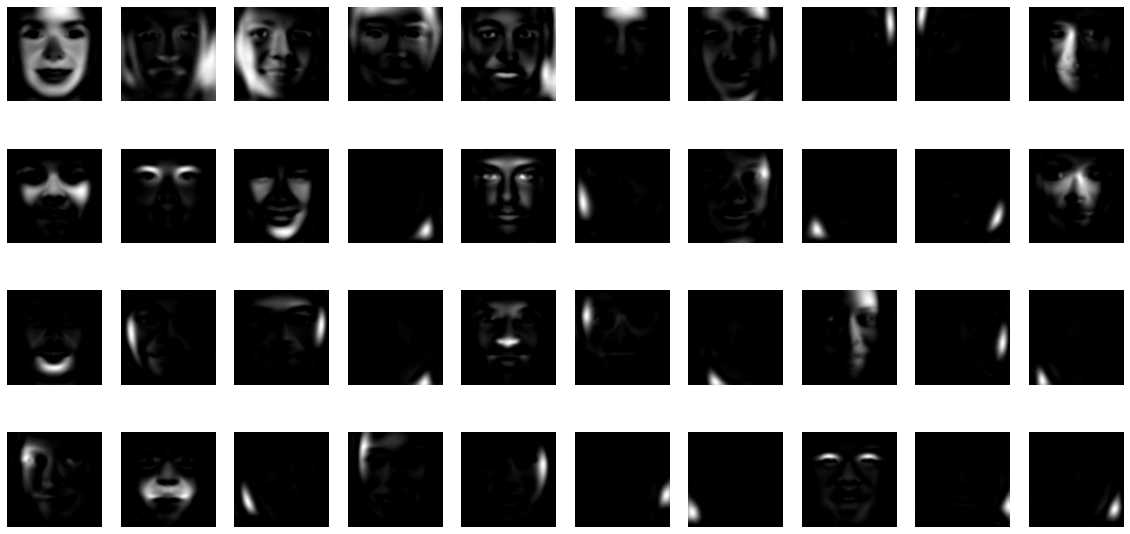

In [74]:
plt.figure(figsize=(20,10))
for k in range(40):
    plt.subplot(4, 10, k + 1)
    plt.imshow(nmf.components_[k].reshape(200,200),cmap = plt.cm.gray)
    plt.axis('off')

In [219]:
#import numpy as np
#import matplotlib.pyplot as plt

#fig = plt.figure(figsize=(8, 8))
#columns = 4
#rows = 4
#for i in range(1, 17):
#    img = image_recon[i]
#    fig.add_subplot(rows, columns, i)
#    plt.imshow(img.reshape(200,200),cmap = plt.cm.gray)
#plt.show()

In [148]:
image_recon.shape

(208, 40000)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, Age, test_size=0.30, random_state=42)

In [83]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [86]:
reg.score(X_train,y_train)

0.48264617838599866

In [84]:
yhat=reg.predict(X_test)

In [85]:
print("RMSE: %.4f" % np.sqrt(np.mean((yhat - y_test.values) ** 2)))

RMSE: 14.2096


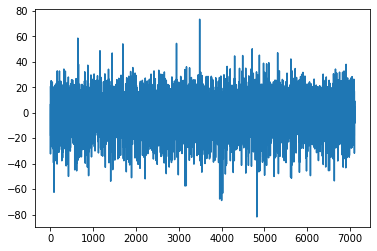

In [92]:
plt.plot(yhat-y_test.values)

In [ ]:
pca_full = PCA(n_components=2)
pca_full.fit(datafull_center)


In [122]:
ratio_var=pca_b.explained_variance_ratio_
#pca_b.explained_variance_ratio_

In [123]:
np.cumsum(ratio_var)

array([0.25830949, 0.41299276, 0.54215488, 0.66769834, 0.71120011,
       0.7501561 , 0.78453025, 0.80791099, 0.8284398 , 0.84619391,
       0.86255985, 0.87446716, 0.88493696, 0.8945564 , 0.90344142,
       0.91114853, 0.91744292, 0.92288276, 0.92777269, 0.93241824,
       0.93696975, 0.94095016, 0.94441781, 0.94773217, 0.95060884,
       0.95331814, 0.9557878 , 0.95817739, 0.96047595, 0.96259137,
       0.96466817, 0.96649033, 0.96819107, 0.96976926, 0.97125423,
       0.97266952, 0.97402617, 0.97533974, 0.97651666, 0.97767093,
       0.97875404, 0.97980541, 0.98081554, 0.98171871, 0.98255759,
       0.98337467, 0.98414443, 0.98488831, 0.98559578, 0.98628425])

In [53]:
cumsum=np.cumsum(inc_pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
print(d)

1


In [29]:
newdata=graydata_center.reshape(-1,40000)

In [30]:
newdata.shape

(23705, 40000)

In [ ]:
pcafull = PCA().fit(newdata)

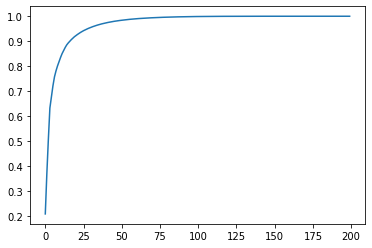

In [126]:
plt.plot(np.cumsum(pcafull.explained_variance_ratio_));

In [129]:
cumsum=np.cumsum(pcafull.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
print(d)

29


In [130]:
# So we can conclude that we can reduce the data from 200*200 to 29 features

In [119]:
#pca_b.singular_values_

In [120]:
#pca_b.explained_variance_ratio_

In [36]:
pca_b.singular_values_.shape

(50,)

In [32]:
pca_b.explained_variance_ratio_.shape

(50,)

<BarContainer object of 50 artists>

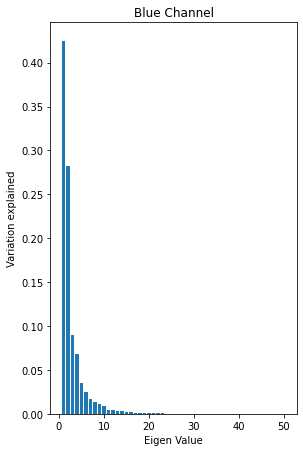

In [46]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)


In [95]:
testpic[:,:,1].reshape(len(testpic[:,:,1]),-1).shape

(200, 200)

In [34]:
lets_see=pd.DataFrame(testpic[:,:,1])

In [35]:
lets_see.shape

(200, 200)

V principal components. U scores and s is....Check this.

In [54]:
def PCA_dim_reduction(X, num_components):

    
    N = len(X)
    
    # Center data
    Xm = X.mean(0)
    Xsd=X.std(0)
    Xc = (X - Xm)/Xsd

    # reduce dimensionality using principal component analysis (PCA) via SVD
    U, s, V = np.linalg.svd(Xc)

    # get eigenvectors corresponding to the two largest eigenvalues
    #eigen_vecs = V[:num_components, :]
    #eigen_vals = s[:num_components]

    # set-up projection matrix
    #Pmat = eigen_vecs.T*(np.sqrt(N)/eigen_vals)
    Pmat=np.dot(Xc,V)
    # project and standize
    return Pmat,U,s,V


In [55]:
p,U,s,V=PCA_dim_reduction(blue_pic,50)

In [52]:
#s

In [65]:
#np.matmul(U,s)

In [89]:
s.shape

(200,)

# Simple case to understand SVD and sklearn PCA

In [28]:
USarrets=pd.read_csv('USArrests.csv',sep=',')

In [30]:
USarrets.columns=['State','Murder','Assualt','UrbanPop','Rape']

In [31]:
USarrets.head()

,State,Murder,Assualt,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [35]:
US_new=USarrets.drop('State',axis=1)

In [37]:
#US_new.head()

In [56]:
p,U,s,V=PCA_dim_reduction(US_new,4)

In [64]:
# These are the standard deviations / singular values
s

array([11.02414792,  6.9640859 ,  4.17990381,  2.91514567])

In [63]:
print('Data dim',US_new.shape)
print('p dim',p.shape)
print('U dim',U.shape)
print('s dim',s.shape)
print('V dim',V.shape)

Data dim (50, 4)
p dim (50, 4)
U dim (50, 50)
s dim (4,)
V dim (4, 4)


In [115]:
# This is the principal component loadings vector. Rows=p features, and columns are the pc1 - pc4.
# 
-V

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [ 0.34123273,  0.26814843,  0.37801579, -0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

In [114]:
# This is the reduced/ projected data set with 4 pc.
US_centered.dot(-V.T)

,0,1,2,3
0,0.975660,-1.122001,0.439804,-0.154697
1,1.930538,-1.062427,-2.019500,0.434175
2,1.745443,0.738460,-0.054230,0.826264
3,-0.139999,-1.108542,-0.113422,0.180974
4,2.498613,1.527427,-0.592541,0.338559
5,1.499341,0.977630,-1.084002,-0.001450
6,-1.344992,1.077984,0.636793,0.117279
7,0.047230,0.322089,0.711410,0.873113
8,2.982760,-0.038834,0.571032,0.095317
9,1.622807,-1.266088,0.339018,-1.065974


Sklearn PCA method

In [72]:
US_m=US_new.mean(0)
US_sd=US_new.std(0)
US_centered=(US_new-US_m)/US_sd

In [78]:
pca_US = PCA(n_components=4)
pca_US.fit(US_centered)


PCA(n_components=4)

In [75]:
# This is the principal component loadings vector. Rows=p features, and columns are the pc1 - pc4.
pca_US.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [76]:
pca_US.singular_values_

array([11.02414792,  6.9640859 ,  4.17990381,  2.91514567])

In [111]:
# Transformed reduced down to 4 dimensions. 
newdata=pca_US.transform(US_centered)
newdata=pd.DataFrame(newdata, columns=['pc1','pc2','pc3','pc4'])

In [112]:
newdata.head()

,pc1,pc2,pc3,pc4
0,0.975660,1.122001,-0.439804,0.154697
1,1.930538,1.062427,2.019500,-0.434175
2,1.745443,-0.738460,0.054230,-0.826264
3,-0.139999,1.108542,0.113422,-0.180974
4,2.498613,-1.527427,0.592541,-0.338559


In [86]:
ratio_var=pca_US.explained_variance_ratio_
pca_US.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [83]:
np.cumsum(ratio_var)

array([0.62006039, 0.86750168, 0.95664248, 1.        ])

In [79]:
pca = PCA().fit(US_centered)

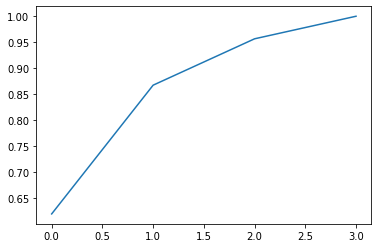

In [80]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [84]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

In [85]:
d

3